In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


df = pd.read_excel("./Sample-data-sets-for-linear-regression1.xlsx")

#Remove NAN values on current dataframe
df.dropna(axis=0, inplace=True)

#Get the sum of NaN values per column
df.isnull().sum()

df.head()


,Unnamed: 0,Unnamed: 1,Mortgage interest rates and home prices
3,Year,interest rate (%),Median home price
4,1988,10.3,183800
5,1989,10.3,183200
6,1990,10.1,174900
7,1991,9.3,173500


## Choose Features

In [156]:
X = df.drop(columns=["Mortgage interest rates and home prices"])

X

,Unnamed: 0,Unnamed: 1
3,Year,interest rate (%)
4,1988,10.3
5,1989,10.3
6,1990,10.1
7,1991,9.3
8,1992,8.4
9,1993,7.3
10,1994,8.4
11,1995,7.9
12,1996,7.6


In [157]:
y = df["Mortgage interest rates and home prices"]

y_ = y.values[1:-1]

In [158]:
X_ = df.iloc[:, [0, 1]].values[1:-1]

X_

array([[1988, 10.3],
       [1989, 10.3],
       [1990, 10.1],
       [1991, 9.3],
       [1992, 8.4],
       [1993, 7.3],
       [1994, 8.4],
       [1995, 7.9],
       [1996, 7.6],
       [1997, 7.6],
       [1998, 6.9],
       [1999, 7.4],
       [2000, 8.1],
       [2001, 7],
       [2002, 6.5],
       [2003, 5.8]], dtype=object)

## Split, train, test and evaluate

In [159]:
(YearInterest_Train,
 YearInterest_Test, 
 HomePrices_Train, 
 HomePrices_Test) = train_test_split(X_, y_, train_size=0.8, random_state=101)

In [160]:
#train
model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)

model.fit(YearInterest_Train, HomePrices_Train)

print("Lr coefficient ---> ", model.coef_)
#predict
predictions = model.predict(YearInterest_Test)

Lr coefficient --->  [14912.59028322 23226.42422533]


## Model Evaluation

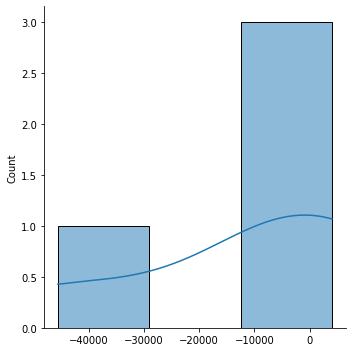

In [161]:
sns.displot(data = (HomePrices_Test-predictions), kde=True)
# plt.scatter(HomePrices_Test, predictions)
# plt.xlabel('Y test')
# plt.ylabel('Predicted Y')


In [162]:
r2_score(HomePrices_Test, predictions)

0.5942858349170299